In [56]:
import math
import numpy as np
import pickle

In [57]:
infile = open("Spice4-transitions_entropy.pkl",'rb')
transitions = pickle.load(infile)
infile.close()

with open('Spice4-cluster_density.pkl', 'rb') as f:
   density = pickle.load(f)

nan_values = np.isnan(transitions)
transitions[nan_values] = 0

np.argwhere(np.isnan(transitions))

array([], shape=(0, 2), dtype=int64)

In [58]:
np.percentile(density, 50)

3846.0

In [59]:
density25 = [idx for idx, val in enumerate(density) if val <= np.percentile(density, 25)]
density50 = [idx for idx, val in enumerate(density) if val > np.percentile(density, 25) and val <= np.percentile(density, 50)]
density75 = [idx for idx, val in enumerate(density) if val > np.percentile(density, 50) and val <= np.percentile(density, 75)]
density100 = [idx for idx, val in enumerate(density) if val > np.percentile(density, 75) and val <= np.percentile(density, 100)]
len(density25), len(density50), len(density75), len(density100)
density_list = [density25, density50, density75, density100]


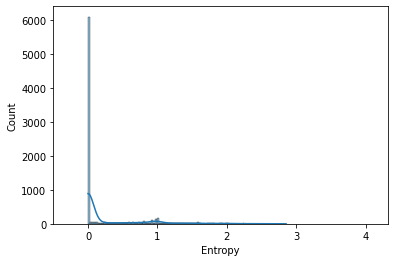

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import timeit

sns.histplot(transitions.flatten(), kde=True, bins=100)
plt.xlabel("Entropy")
plt.xlim(-.5, math.log(20,2))
plt.show()

In [61]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import timeit

for perc, den in zip([250, 500, 750, 1000], density_list):
    fig, axes = plt.subplots(ncols=25, nrows=10)
    fig.set_figheight(90)
    fig.set_figwidth(180)
    flat_data = transitions.flatten().tolist()
    perc25 = math.log(20,2)/4
    perc50 = math.log(20,2)/4 * 2
    perc75 = math.log(20,2)/4 * 3
    for i, ax in zip(den, axes.flat):
        if np.percentile(transitions[:,i].flatten(), 50) < perc25:
            color = 'lightgreen'
            label = '0 to 25 Percentile'
        elif np.percentile(transitions[:,i].flatten(), 50) < perc50:
            color = 'lightskyblue'
            label = '25 to 50 percentile'
        elif np.percentile(transitions[:,i].flatten(), 50) < perc75:
            color = 'orange'
            label = '50 to 75 percentile'
        else:
            color = 'tomato'
            label = '75 to 100 percentile'
        sns.histplot(transitions[:,i].flatten(),legend=False, kde=True, ax=ax, color=color, label=label)
        ax.set_xlim(-0.1, math.log(20,2))
        ax.set_ylabel('')
        ax.set_xlabel('Cluster: '+str(i))

    handle_list, label_list = [], []
    for ax in axes.flat:
        handles, labels = ax.get_legend_handles_labels()
        for handle, label in zip(handles, labels):
            if label not in label_list:
                handle_list.append(handle)
                label_list.append(label)

    plt.figlegend( handle_list, label_list, loc = 'upper right', prop={'size':40})
    fig.tight_layout(pad=1.0)
    plt.savefig('Spice4 '+str(perc-250)+' to '+str(perc)+' Clusters.png')
    plt.show()

c:\python38\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\python38\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\python38\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\python38\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\python38\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\python38\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\python38\lib\site-packages\seaborn\distributions.

In [65]:
len(density_list[1])

62

In [ ]:
transitions[:, density_list[1][65]]

In [ ]:
import math
fig, axes = plt.subplots(ncols=25, nrows=20)
fig.set_figheight(90)
fig.set_figwidth(180)
flat_data = transitions.flatten().tolist()
perc25 = math.log(20,2)/4
perc50 = math.log(20,2)/4 * 2
perc75 = math.log(20,2)/4 * 3

for i, ax in zip(range(500), axes.flat):
    if np.percentile(transitions[:,i].flatten(), 50) < perc25:
        color = 'lightgreen'
        label = '0 to 25 Percentile'
    elif np.percentile(transitions[:,i].flatten(), 50) < perc50:
        color = 'lightskyblue'
        label = '25 to 50 percentile'
    elif np.percentile(transitions[:,i].flatten(), 50) < perc75:
        color = 'orange'
        label = '50 to 75 percentile'
    else:
        color = 'tomato'
        label = '75 to 100 percentile'
    sns.histplot(transitions[:,i].flatten(),legend=False, kde=True, ax=ax, color=color, label=label)
    ax.set_xlim(-0.1, math.log(20,2))
    ax.set_ylabel('')
    ax.set_xlabel('Cluster: '+str(i))

handle_list, label_list = [], []
for ax in axes.flat:
    handles, labels = ax.get_legend_handles_labels()
    for handle, label in zip(handles, labels):
        if label not in label_list:
            handle_list.append(handle)
            label_list.append(label)

plt.figlegend( handle_list, label_list, loc = 'upper right', prop={'size':40})
fig.text(5,5,"Hello", fontsize = 100)
fig.tight_layout(pad=1.0)
plt.savefig('Spice1-1 to 500 Clusters.png')
plt.show()

In [43]:
import math
fig, axes = plt.subplots(ncols=5, nrows=4)
fig.set_figheight(90)
fig.set_figwidth(180)
flat_data = transitions.flatten().tolist()
perc25 = math.log(20,2)/4
perc50 = math.log(20,2)/4 * 2
perc75 = math.log(20,2)/4 * 3

for i, ax in zip(range(20), axes.flat):
    if np.percentile(transitions[i,:].flatten(), 50) < perc25:
        color = 'lightgreen'
        label = '0 to 25 Percentile'
    elif np.percentile(transitions[i,:].flatten(), 50) < perc50:
        color = 'lightskyblue'
        label = '25 to 50 percentile'
    elif np.percentile(transitions[i,:].flatten(), 50) < perc75:
        color = 'orange'
        label = '50 to 75 percentile'
    else:
        color = 'tomato'
        label = '75 to 100 percentile'
    sns.histplot(transitions[i,:].flatten(),legend=False, kde=True, ax=ax, color=color, label=label)
    ax.set_xlim(-0.1, math.log(20,2))
    ax.set_ylabel('')
    ax.set_xlabel('Cluster: '+str(i))

handle_list, label_list = [], []
for ax in axes.flat:
    handles, labels = ax.get_legend_handles_labels()
    for handle, label in zip(handles, labels):
        if label not in label_list:
            handle_list.append(handle)
            label_list.append(label)

plt.figlegend( handle_list, label_list, loc = 'upper right', prop={'size':40})
fig.tight_layout(pad=1.0)
plt.savefig('Spice1 Letters')
plt.show()
